<a href="https://colab.research.google.com/github/Josback04/Univ-code/blob/main/KNN_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prédiction: Pas de cancer
Probabilité: [0.6 0.4]


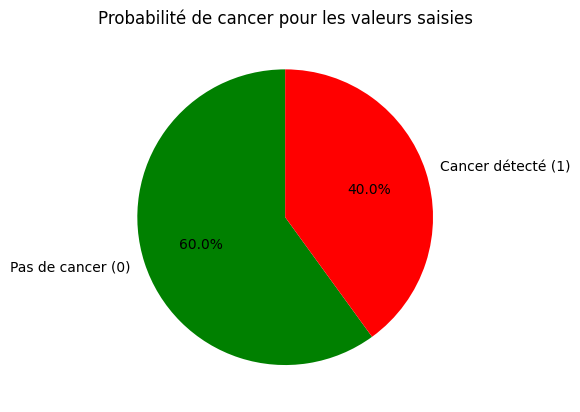

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Chargement du dataset
df = pd.read_csv("/content/dataset_cancer.csv")

# Encodage des variables catégoriques
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])  # Convertit 'M' et 'F' en 0 et 1
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])  # Convertit 'YES' et 'NO' en 1 et 0

# Sélection des features et de la cible
features = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
            'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
            'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
X = df[features]
Y = df['LUNG_CANCER']

# Création et entraînement du modèle
modele = KNeighborsClassifier()
modele.fit(X, Y)

def Consultation_cancer(Age, Smoking, Yellow_Fingers, Anxiety, Peer_Pressure, Chronic_Disease,
                         Fatigue, Allergy, Wheezing, Alcohol_Consuming, Coughing,
                         Shortness_of_Breath, Swallowing_Difficulty, Chest_Pain, modele):

    Xn = pd.DataFrame([[Age, Smoking, Yellow_Fingers, Anxiety, Peer_Pressure, Chronic_Disease,
                         Fatigue, Allergy, Wheezing, Alcohol_Consuming, Coughing,
                         Shortness_of_Breath, Swallowing_Difficulty, Chest_Pain]],
                       columns=features)
    prediction = modele.predict(Xn)
    proba = modele.predict_proba(Xn)[0]

    print("Prédiction:", "Cancer détecté" if prediction[0] == 1 else "Pas de cancer")
    print("Probabilité:", proba)

    labels = ['Pas de cancer (0)', 'Cancer détecté (1)']
    colors = ['green', 'red']

    plt.pie(proba, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f"Probabilité de cancer pour les valeurs saisies")
    plt.show()

# Exemple d'utilisation
Consultation_cancer(60, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, modele)
